In [2]:
#Analysis Goal :
#To check the positive and negative reviews


#inspiration : 

Business Understanding

Bad product or service review could turn customers away , and it's now common for customer to do their own research before deciding a purchase. 
With the easily accessible information at hand, consumer like to compare features like price, product review, brand, etc. 
During the research , consumer able to look at positive or negative review from a product or services.

Study founds that online reviews affect 67% of consumer purchasing decision. 
A positive reviews would increase the reputation, and able to drive more sales. 
Meanwhile, Negative review could be detrimental to business. Revenue Loss, Undermine brand image, drive away customer visit, low search traffic.

Therefore, it's essential to track positive and negative review and do immediate response for better product and brand reputation

How to identify positive and negative review ? 
What are the popular words from the comments? 
How to detect negative review and does it robust enough to detect the sentiment ?

In [3]:
#https://soundwave.co.uk/blog/study-finds-67-of-consumers-are-influenced-by-online-reviews

In [5]:
import pandas as pd 
seattle_raw_list = pd.read_csv("/Users/yogisharosarumaha/Udacity Project 1/airbnb_seattle_data/listings.csv") 
seattle_raw_rev = pd.read_csv("/Users/yogisharosarumaha/Udacity Project 1/airbnb_seattle_data/reviews.csv") 

boston_raw_list = pd.read_csv("/Users/yogisharosarumaha/Udacity Project 1/airbnb_boston_data/listings.csv") 
boston_raw_rev = pd.read_csv("/Users/yogisharosarumaha/Udacity Project 1/airbnb_boston_data/reviews.csv") 

amsterdam_raw_list = pd.read_csv("/Users/yogisharosarumaha/Udacity Project 1/airbnb_amsterdam_data/listings.csv") 
amsterdam_raw_rev = pd.read_csv("/Users/yogisharosarumaha/Udacity Project 1/airbnb_amsterdam_data/reviews.csv") 

In [6]:
#Look at the first rows from Listings and Review dataset
display(seattle_raw_list.head(3),seattle_raw_rev.head(3))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


# Combine dataset

In [7]:
#Label each area
seattle_raw_list['area'] = 'seattle'
seattle_raw_rev['area'] = 'seattle'

boston_raw_list['area'] = 'boston'
boston_raw_rev['area'] = 'boston'

amsterdam_raw_list['area'] = 'amsterdam'
amsterdam_raw_rev['area'] = 'amsterdam'

#Union all the cities dataset
concat_list_df = pd.concat([seattle_raw_list,boston_raw_list,amsterdam_raw_list], ignore_index=True)
concat_rev_df = pd.concat([seattle_raw_rev,boston_raw_rev,amsterdam_raw_rev], ignore_index=True)

# Positive review for all places

In [8]:
concat_list_df.groupby('area')["review_scores_rating"].describe().transpose()

area,amsterdam,boston,seattle
count,16240.000000,2772.000000,3171.000000
mean,95.177094,91.916667,94.539262
std,6.841266,9.531686,6.606083
min,20.000000,20.000000,20.000000
25%,93.000000,89.000000,93.000000
50%,97.000000,94.000000,96.000000
75%,100.000000,98.250000,99.000000
max,100.000000,100.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee14a2cf90>,
      dtype=object)

<Figure size 1440x576 with 0 Axes>

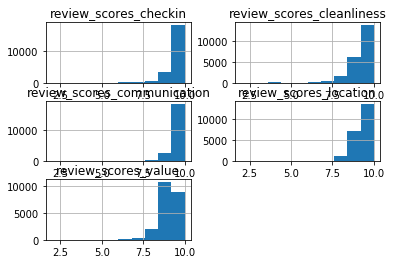

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,8))
# One subplot again

concat_list_df[["review_scores_value",
                  "review_scores_checkin",
                  "review_scores_cleanliness",
                 "review_scores_communication",
                 "review_scores_location"]].hist(label='value')

# What are customers mostly saying


In [10]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
#to split words

### Word Frequency

In [11]:
#count missing values
concat_rev_df['comments'].isnull().sum()

339

In [12]:
import itertools
import collections

def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

all_words_review = convert(concat_rev_df['comments'].fillna("")) #Fill in missing reviews with blank
count_word = collections.Counter(all_words_review) #Count word frequency

In [13]:
clean_word_count = pd.DataFrame(count_word.most_common(5),
                             columns=['words', 'count'])

clean_word_count.head()

,words,count
0,the,1500547
1,and,1387407
2,a,915942
3,to,859042
4,was,694110


# Removing Stopwords

In [14]:
import nltk
from nltk.corpus import stopwords

In [28]:
stop_words = set(stopwords.words(['dutch','english']))

# View a few words from the set
list(stop_words)[0:500]

["isn't",
 'als',
 'kon',
 'kunnen',
 'andere',
 'it',
 'was',
 "hasn't",
 "haven't",
 'doch',
 'tegen',
 'more',
 'couldn',
 'didn',
 'these',
 'be',
 'aren',
 "shouldn't",
 'kan',
 'herself',
 'am',
 'moet',
 "needn't",
 'are',
 'than',
 'why',
 'shouldn',
 'voor',
 'geen',
 'iets',
 'onder',
 'eens',
 'and',
 'een',
 'je',
 "mightn't",
 "weren't",
 "doesn't",
 "you're",
 'can',
 'down',
 'itself',
 'is',
 'de',
 'altijd',
 'daar',
 'whom',
 'such',
 'himself',
 'doing',
 'during',
 'who',
 'werd',
 'its',
 'if',
 'll',
 'by',
 'wil',
 'yourselves',
 'wordt',
 'so',
 'zal',
 'what',
 "wasn't",
 'meer',
 'hebben',
 'niets',
 'hasn',
 "shan't",
 'each',
 'a',
 'haar',
 'you',
 'aan',
 'we',
 'zelf',
 'yourself',
 's',
 "won't",
 'because',
 'al',
 'for',
 'isn',
 'men',
 'uw',
 'maar',
 'just',
 'before',
 'then',
 'zich',
 'out',
 'zou',
 'iemand',
 'en',
 "she's",
 'does',
 'no',
 'heeft',
 'ons',
 'don',
 'weren',
 "couldn't",
 "you'll",
 'wouldn',
 'omdat',
 'heb',
 'has',
 'wat',


In [29]:
words_review_cleaned = [word for word in all_words_review if word not in stop_words]
words_review_count = collections.Counter(words_review_cleaned)

word_review_count_df = pd.DataFrame(words_review_count.most_common(15),
                             columns=['words', 'count'])

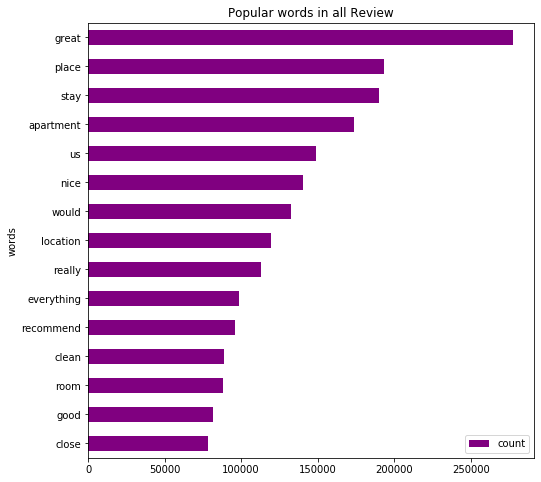

In [67]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Popular words in all Review")

plt.show()

# Sentiment Analysis to detect good/bad Reviews

In [69]:
# Snippet from :
# https://www.kaggle.com/residentmario/sentiment-analysis-and-collocation-of-reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in concat_rev_df['comments'].values[1:3]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Kelly has a great room in a very central location. 
Beautiful building , architecture and a style that we really like. 
We felt guite at home here and wish we had spent more time.
Went for a walk and found Seattle Center with a major food festival in progress. What a treat.
Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW.  Thanks for a great stay.
compound: 0.9872, neg: 0.0, neu: 0.609, pos: 0.391, 
Very spacious apartment, and in a great neighborhood.  This is the kind of apartment I wish I had!

Didn't really get to meet Kelly until I was on my out, but she was always readily available by phone. 

I believe the only "issue" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday
compound: 0.8718, neg: 0.043, neu: 0.772, pos: 0.185, 


In [70]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

reviews_f = [r for r in concat_rev_df['comments'] if pd.notnull(r) and get_language(r) in ['dutch','english']]

pscores = [sid.polarity_scores(comment) for comment in reviews_f]

Text(0, 0.5, 'frequency')

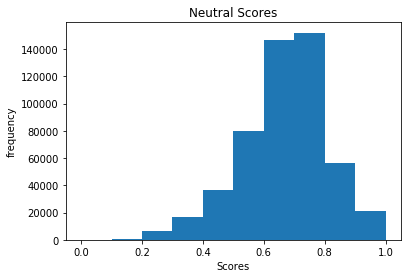

In [73]:
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

plt.title('Neutral Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')


Text(0, 0.5, 'frequency')

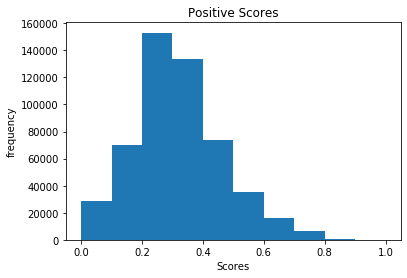

In [74]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

plt.title('Positive Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

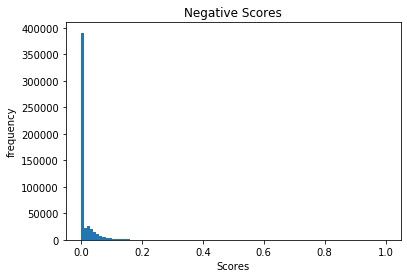

In [75]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)

plt.title('Negative Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

In [66]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f if get_language(r) in ['dutch','english']]


In [80]:
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]

In [ ]:
Bad review

In [99]:
scored_reviews.query('compound < -0.5')

,review,compound,negativity,neutrality,positivity
1302,Leah was very responsive and attentive. When I...,-0.8725,0.087,0.852,0.061
2099,"At first time, Pj was nice and answer quickly ...",-0.8537,0.160,0.747,0.093
2825,"Great neighborhood, but the ""patio"" photo was ...",-0.8551,0.209,0.708,0.083
3282,The place we stayed was completely different f...,-0.5106,0.057,0.943,0.000
3758,Mia hosted me even though it was during a busy...,-0.6956,0.111,0.889,0.000
...,...,...,...,...,...
517873,"First of all, the stairs are not good for old ...",-0.5272,0.121,0.816,0.063
517895,Personeel is zeer gastvrij.\nLeuke kamer.\nGoe...,-0.5994,0.145,0.855,0.000
517989,Very horrible,-0.5849,0.791,0.209,0.000
517996,Not an accurate description. The photos didn’t...,-0.9389,0.216,0.725,0.058


In [97]:
scored_reviews.iloc[2825]['review']

'Great neighborhood, but the "patio" photo was misleading. There was no table and chair(s) - you have to climb out a window onto a roof that can be accessed by several other windows, so limited privacy.\r\nIt would have been helpful to know before booking that there was no coffee maker, toaster, or microwave and that parking can be difficult.\r\nComfy bed, though.'

In [ ]:
Started out as a positive review, the follow up sentence was mostly negative

In [98]:
scored_reviews.iloc[517895]['review']

'Personeel is zeer gastvrij.\nLeuke kamer.\nGoed gelegen, je kan overal snel geraken met de tramhalte die nabij is.\nMusea is te voet bereikbaar.'

In [106]:
scored_reviews.query('negativity > positivity').query('compound < -0.8')

,review,compound,negativity,neutrality,positivity
1302,Leah was very responsive and attentive. When I...,-0.8725,0.087,0.852,0.061
2099,"At first time, Pj was nice and answer quickly ...",-0.8537,0.160,0.747,0.093
2825,"Great neighborhood, but the ""patio"" photo was ...",-0.8551,0.209,0.708,0.083
4789,I was disappointed in the rental. It had no t...,-0.9306,0.230,0.770,0.000
4989,"Overall, I was disappointed in the rental and ...",-0.8910,0.123,0.803,0.075
...,...,...,...,...,...
515981,The experience was just a nightmare...basicall...,-0.9371,0.113,0.887,0.000
516995,Hotel met vriendelijk personeel op een goede l...,-0.8271,0.061,0.939,0.000
517110,Really disappointed at the failure of the host...,-0.9234,0.195,0.777,0.028
517388,Nice apartment but 50 minute walk from the cit...,-0.8102,0.113,0.861,0.026


In [105]:
scored_reviews.iloc[516995]['review']

"Hotel met vriendelijk personeel op een goede locatie in De Pijp, aan het park en niet ver van de metrohalte. De kamer had wat mindere punten, zo lag een van de twee bedden niet fijn, omdat het matras smaller was dan de topper die erop lag, waardoor je schuin ligt of eraf glijdt als je een beetje naar de zijkant ligt. Ook was het gordijn in onze kamer te smal om het hele raam te bedekken en was er 's nachts veel herrie buiten. \nAl met al een prima betaalbaar hotel om een nachtje in Amsterdam te verblijven, vanwege de goede bereikbaarheid met het OV en de vele leuke cafeetjes en restaurantjes in de buurt. Voor een langer verblijf vind ik het niet zo geschikt, omdat we door bovengenoemde punten niet zo'n hele goede nachtrust hebben gehad."

In [ ]:
References

#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/